In [1]:
import pandas as pd
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.preprocessing import compute_proj_ecg
import mne_features as mn

In [2]:
# Creates a variable that holds MEG data
raw = mne.io.read_raw_fif('A1-raw.fif')

Opening raw data file A1-raw.fif...
    Read a total of 8 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
    Range : 1530000 ... 3540999 =    306.000 ...   708.200 secs
Ready.


In [64]:
#prints information about raw (MEG data).
print(raw.info)

<Info | 20 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, EEG001, EEG002, MEG0111, MEG0121, ...
 chs: 2 EOG, 1 ECG, 2 EEG, 103 Magnetometers, 2 Stimulus, 1 SYST
 custom_ref_applied: False
 description: DL
 dig: 444 items (3 Cardinal, 11 HPI, 3 EEG, 427 Extra)
 experimenter: natmeg (natmeg)
 file_id: 4 items (dict)
 gantry_angle: 0.0
 highpass: 0.1 Hz
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 1650.0 Hz
 meas_date: 2015-12-10 12:16:33 UTC
 meas_id: 4 items (dict)
 nchan: 111
 proj_id: 1 item (ndarray)
 proj_name: neuro_squid
 projs: generated with autossp-1.0.1: off, generated with autossp-1.0.1: ...
 sfreq: 5000.0 Hz
 subject_info: 3 items (dict)
>


Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


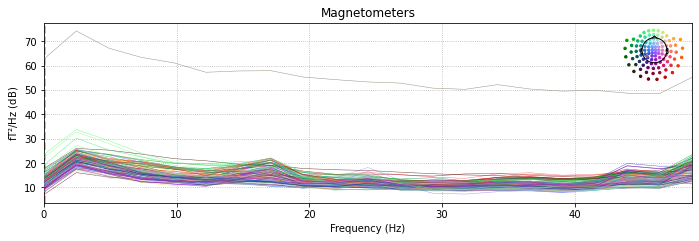

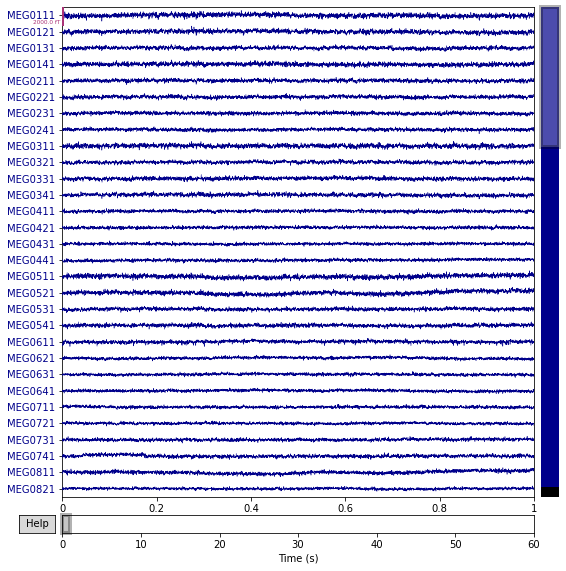

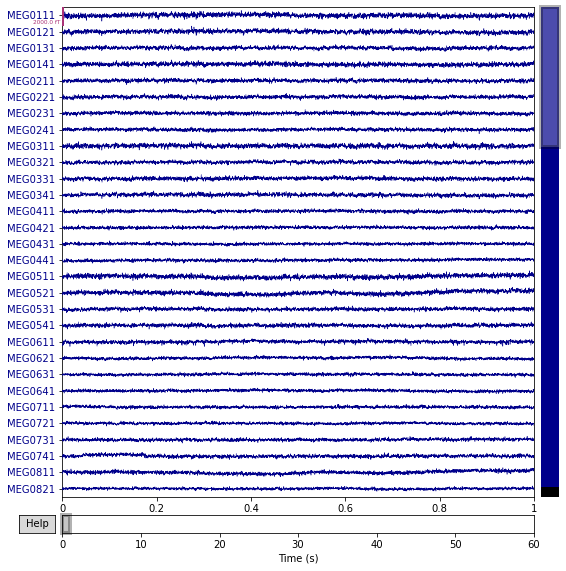

In [60]:
# plots graphs of data.
raw.plot_psd(fmax=50)
raw.plot(duration=1, n_channels=30)

In [12]:
# Read events from file
events_from_file = mne.read_events('A1-eve.fif')

# Creating epochs object
epochs = mne.Epochs(raw, events_from_file, tmin=-0.3, tmax=0.7)

Not setting metadata
1049 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 5)
8 projection items activated


Loading data for 1049 events and 5001 original time points ...
Not setting metadata
1049 matching events found
No baseline correction applied
0 projection items activated


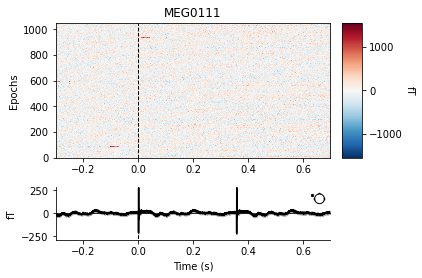

[<Figure size 432x288 with 4 Axes>]

In [21]:
# plot epochs
epochs.plot(n_epochs = 10)

In [19]:
# get data from epochs as a numpy array (n_epochs, n_channels,n_times)
meg_data = epochs.get_data(picks=['mag', 'grad'])

In [20]:
# extracts features from epochs
fe = mn.feature_extraction.extract_features(meg_data,sfreq=5000.0, selected_funcs=['std', 'kurtosis'])
print(fe)
#band pass filter (1-100 Hz)
# low pass filter (ex. average) (cut off at 100)
# high pass filter (cut off at one)

[[1.60314585e-13 1.42989241e-13 1.33474464e-13 ... 4.21559796e+00
  3.65622159e+00 2.45104474e+00]
 [1.57767382e-13 1.41136917e-13 1.27252224e-13 ... 3.50020261e+00
  3.46558409e+00 2.44845108e+00]
 [1.52643178e-13 1.38321766e-13 1.26663986e-13 ... 3.56624057e+00
  3.27627196e+00 2.45884535e+00]
 ...
 [1.53801148e-13 1.42122868e-13 1.31983446e-13 ... 3.85737889e+00
  3.42718330e+00 2.71327929e+00]
 [1.52334243e-13 1.41704172e-13 1.30288379e-13 ... 3.72834983e+00
  3.49826884e+00 2.69251274e+00]
 [1.56270783e-13 1.43486672e-13 1.27969922e-13 ... 3.34625531e+00
  3.28649871e+00 2.70042827e+00]]


In [22]:
raw.crop(0, 60).pick_types(meg='mag', stim=True).load_data()

Reading 0 ... 300000  =      0.000 ...    60.000 secs...


<Raw | A1-raw.fif, 105 x 300001 (60.0 s), ~240.8 MB, data loaded>

Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


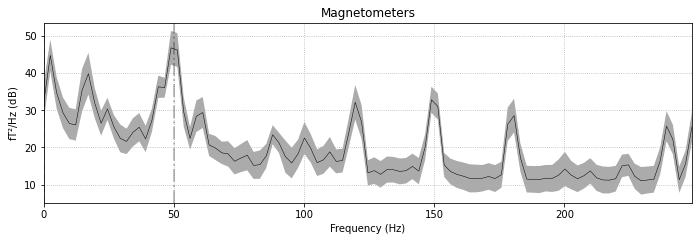

In [30]:
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4):(idx + 5)].max()
            ax.arrow(x=freqs[idx], y=y + 18, dx=0, dy=-12, color='red',
                     width=0.1, head_width=3, length_includes_head=True)


fig = raw.plot_psd(fmax=250, average=True)
add_arrows(fig.axes[:2])

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    3.6s finished


Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


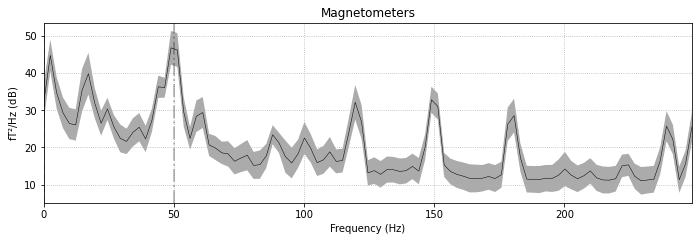

Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


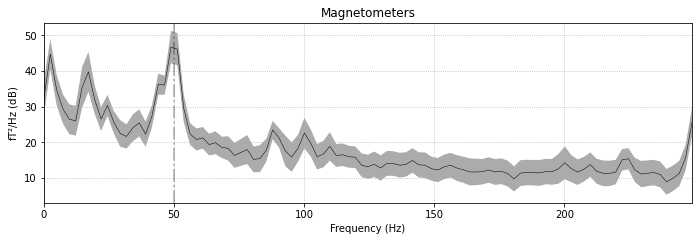

In [32]:
meg_picks = mne.pick_types(raw.info, meg=True)
freqs = (60, 120, 150, 180, 240)
raw_notch = raw.copy().notch_filter(freqs=freqs, picks=meg_picks)
for title, data in zip(['Un', 'Notch '], [raw, raw_notch]):
    fig = data.plot_psd(fmax=250, average=True)
    fig.subplots_adjust(top=0.85)
    fig.suptitle('{}filtered'.format(title), size='xx-large', weight='bold')
    add_arrows(fig.axes[:2])

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 50000 samples (10.000 sec)

Number of ECG events detected : 51 (average pulse 50 / min.)
Not setting metadata
51 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 5)
Using data from preloaded Raw for 51 events and 5001 original time points ...
1 bad epochs dropped
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


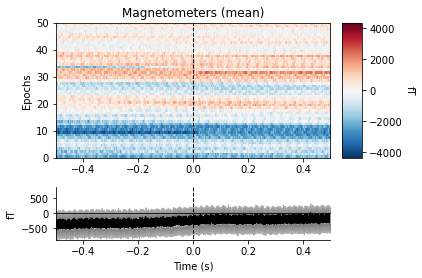

[<Figure size 432x288 with 3 Axes>]

In [40]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine='mean')

Using channel ECG003 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 50000 samples (10.000 sec)

Number of ECG events detected : 440 (average pulse 65 / min.)
Not setting metadata
440 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 5)
Using data from preloaded Raw for 440 events and 5001 original time points ...
1 bad epochs dropped
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 5)
8 projection items activated
SSP projectors applied...
Removing projector <Projection 

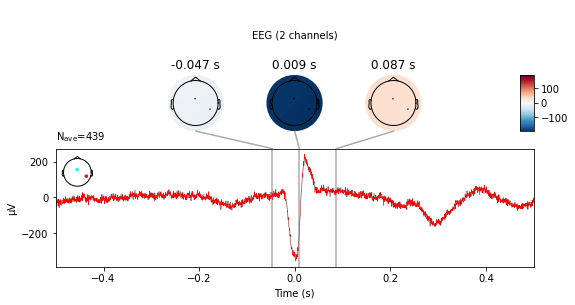

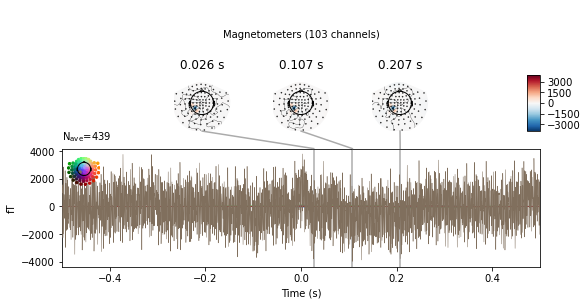

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [5]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
ecg_evoked = create_ecg_epochs(raw).average()
ecg_evoked.apply_baseline(baseline=(None, -0.2))
ecg_evoked.plot_joint()

In [15]:
raw.load_data()
filt_raw = raw.copy().filter(l_freq=None, h_freq=300)


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 3e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 300.00 Hz
- Upper transition bandwidth: 75.00 Hz (-6 dB cutoff frequency: 337.50 Hz)
- Filter length: 221 samples (0.044 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:   32.0s finished


In [16]:
ica = ICA(n_components=50, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica


Fitting ICA to data using 105 channels (please be patient, this may take a while)
Selecting by number: 50 components


<ipython-input-16-33cb5d54c7f7>:2: RuntimeWarning: Using n_components=50 (resulting in n_components_=50) may lead to an unstable mixing matrix estimation because the ratio between the largest (63) and smallest (2.7e-05) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 18
  ica.fit(filt_raw)


Fitting ICA took 457.2s.


Method,fastica
Fit,100 iterations on raw data (2011000 samples)
ICA components,50
Explained variance,100.0 %
Available PCA components,105
Channel types,"mag, eeg"
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=53, n_times=2011000
    Range : 1530000 ... 3540999 =    306.000 ...   708.200 secs
Ready.


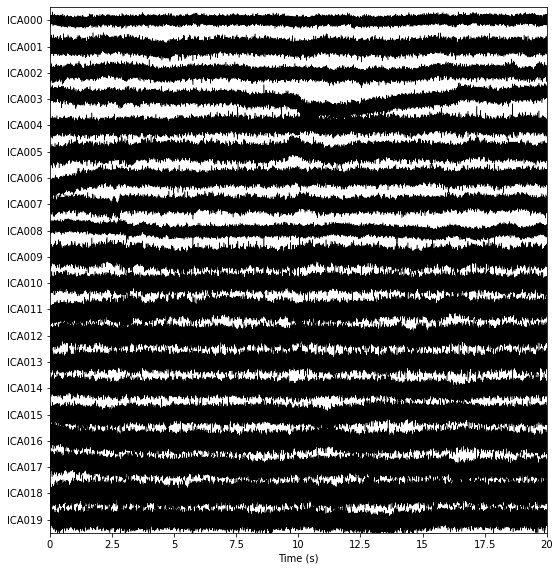

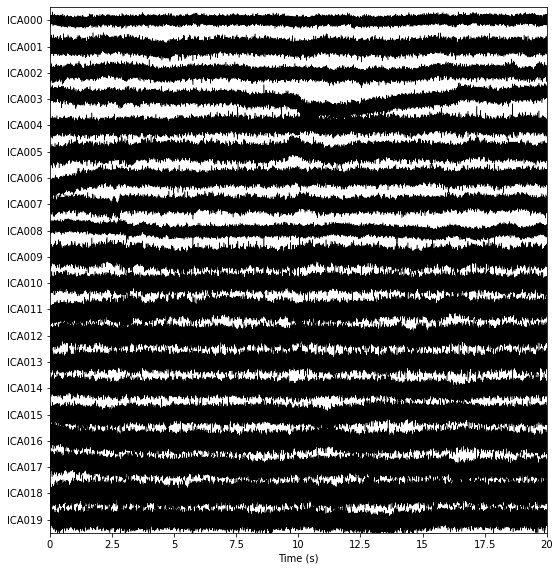

In [18]:
ica.plot_sources(raw, show_scrollbars=False)

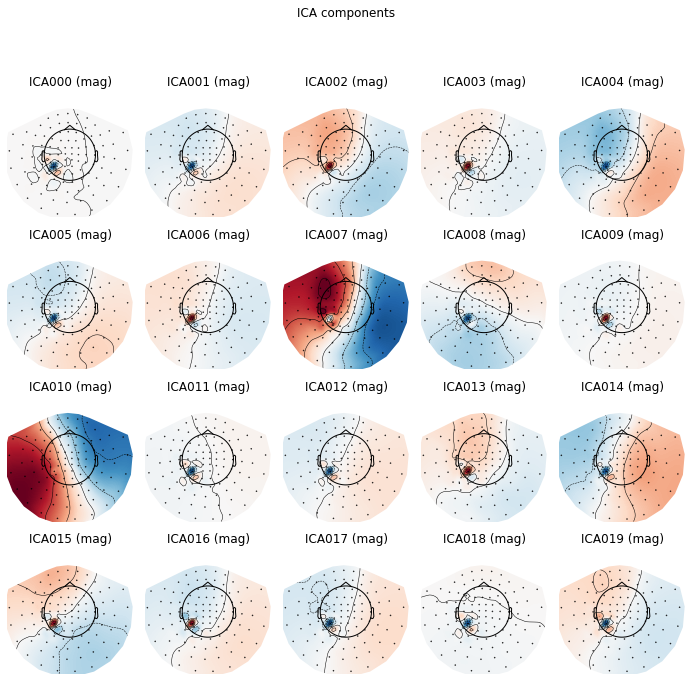

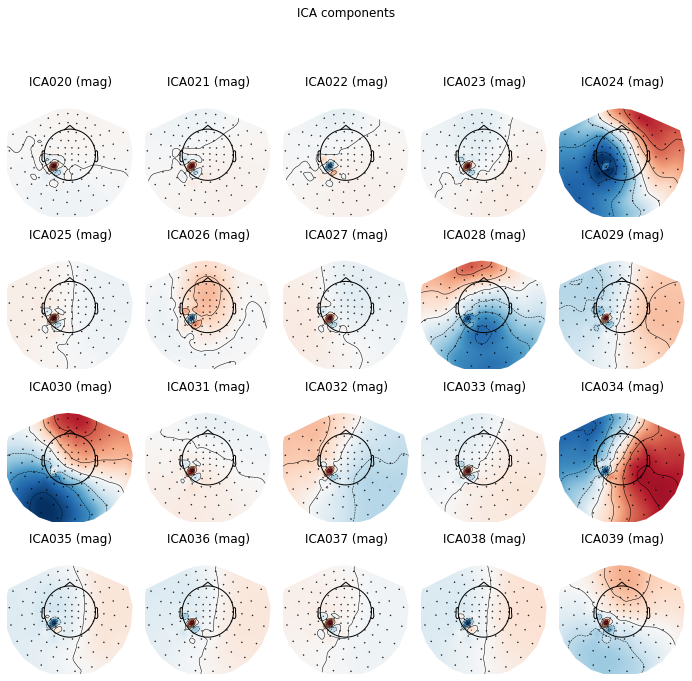

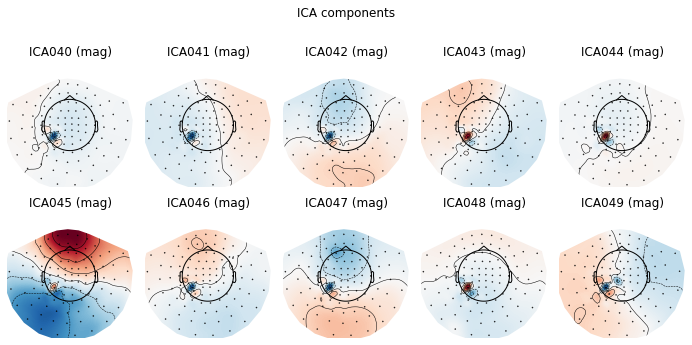

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x357.12 with 10 Axes>]

In [19]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (50 components)
    Zeroing out 1 ICA component
    Projecting back using 105 PCA components


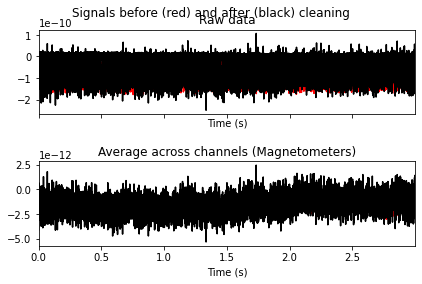

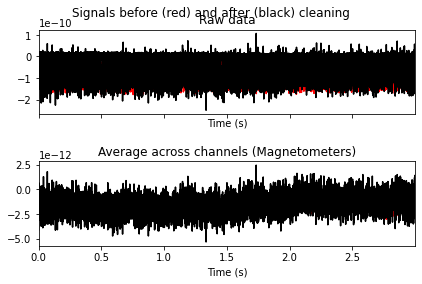

In [20]:
ica.plot_overlay(raw, exclude=[1], picks='mag')

In [3]:
ssp_projectors = raw.info['projs']
raw.del_proj()

<Raw | A1-raw.fif, 111 x 2011000 (402.2 s), ~317 kB, data not loaded>

In [21]:
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f'Fraction of {channel_type} variance explained by all components: '
        f'{ratio}'
    )

AttributeError: 'ICA' object has no attribute 'get_explained_variance_ratio'

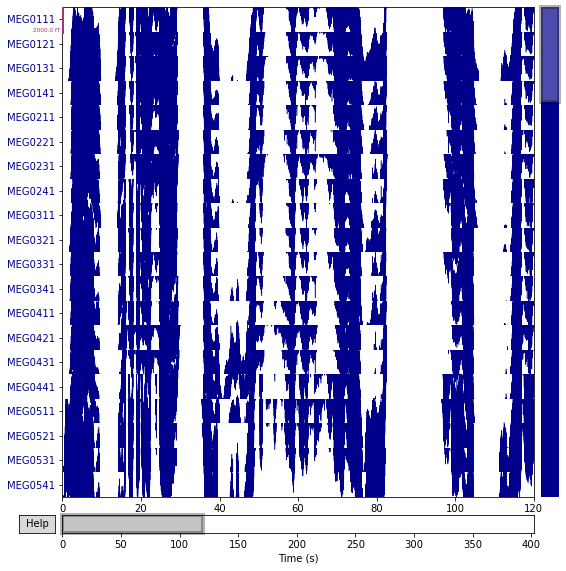

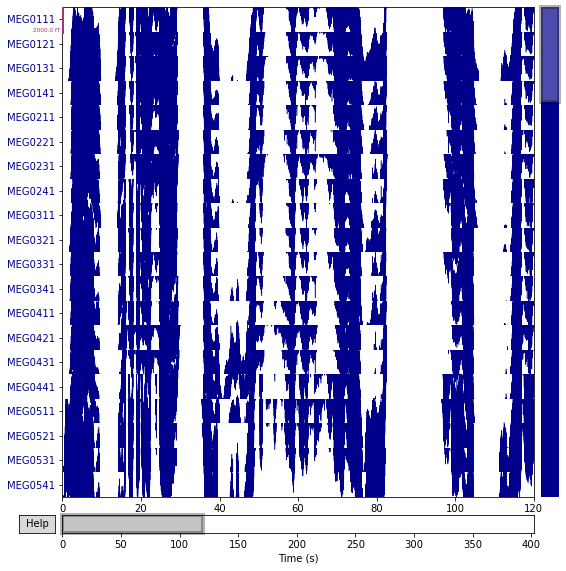

In [7]:
mag_channels = mne.pick_types(raw.info, meg='mag')
raw.plot(duration=120, order=mag_channels, n_channels=20,
         remove_dc=False)

Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.1s finished


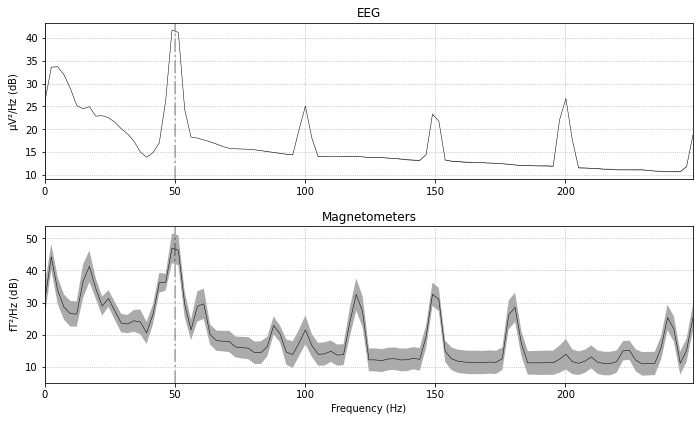

In [4]:
fig = raw.plot_psd(tmax=np.inf, fmax=250, average=True)
# add some arrows at 60 Hz and its harmonics:
for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Using EOG channels: EOG001, EOG002
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 50000 samples (10.000 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 32 significant peaks
Number of EOG events detected: 32
Not setting metadata
32 matching events found
Applying baseline correction (mode: mean)
Loading data for 32 events and 5001 original time points ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


3 bad epochs dropped
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


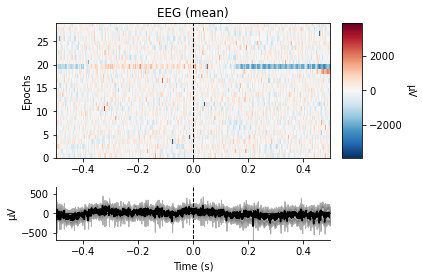

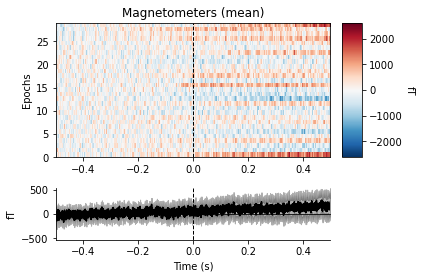

No projector specified for this dataset. Please consider the method self.add_proj.


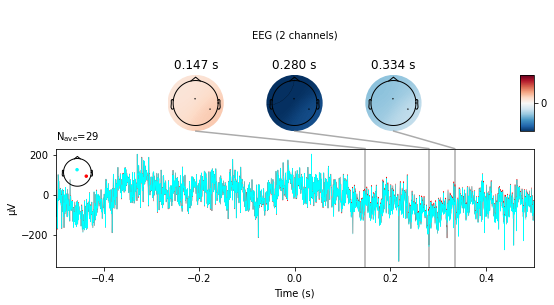

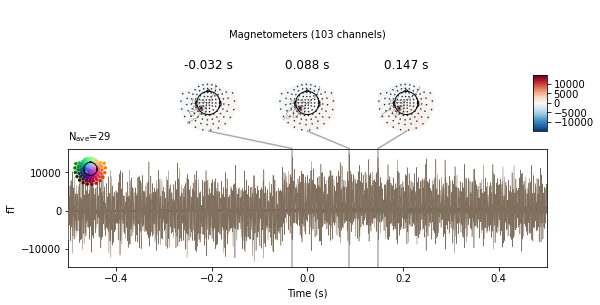

[<Figure size 576x302.4 with 7 Axes>, <Figure size 576x302.4 with 7 Axes>]

In [5]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine='mean')
eog_epochs.average().plot_joint()

In [1]:
ica.plot_components()

NameError: name 'ica' is not defined